##### This file consists examples and uses of some important function of Python OpenCV and Glob library for Batch transformations

# OpenCV Matrix Tricks

What Is OpenCV and Why Use Matrices?

- **OpenCV** works with images as 2D or 3D NumPy arrays—each pixel is a value in these matrices.
- Matrix operations allow fast and flexible manipulation of images: blending, masking, cropping, filtering.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## BGR

Shape of img in BGR:  (377, 800, 3)
Shape after slicing 4 rows and 2 column (4, 2, 3)


First 4 rows and 2 columns of image in BGR: 
 [[[144 109  45]
  [144 109  45]]

 [[144 109  46]
  [144 109  45]]

 [[144 108  48]
  [144 109  46]]

 [[145 108  50]
  [145 108  50]]]


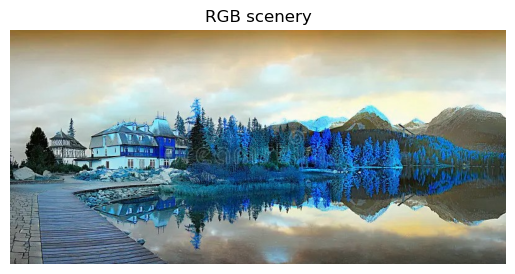

In [2]:
# Loading image
img_BGR = cv2.imread('Color-image-scenery.jpg')        # by default this funct changes img to BGR

#Shape
print('Shape of img in BGR: ',img_BGR.shape)           #Each color image is height x width x RGB channels.
print("Shape after slicing 4 rows and 2 column",img_BGR[:4,:2].shape)


# Pixels of first 4 rows and 2 column of image in BGR
print('\n\nFirst 4 rows and 2 columns of image in BGR: \n',img_BGR[:4,:2])

# to Display image
plt.imshow(img_BGR)
plt.title("RGB scenery")      
plt.axis("off")
plt.show()

## RGB

Shape of img in BGR:  (377, 800, 3)


First 4 rows and 2 columns of image in RGB: 
 [[[ 45 109 144]
  [ 45 109 144]]

 [[ 46 109 144]
  [ 45 109 144]]

 [[ 48 108 144]
  [ 46 109 144]]

 [[ 50 108 145]
  [ 50 108 145]]]


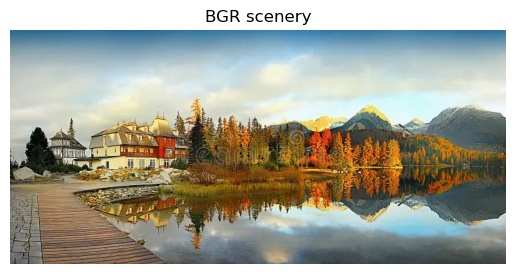

In [3]:
# Converting to RGB
img = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)

#Shape
print('Shape of img in BGR: ',img.shape)           

# NOTE: shape will be same for both BGR & RGB but their image will have different pixels

# First 4 rows and 2 columns
print('\n\nFirst 4 rows and 2 columns of image in RGB: \n',img[:4,:2])

# Display image of RGB
plt.imshow(img)
plt.title("BGR scenery")
plt.axis("off")
plt.show()

## GRAYSCALE

Shape of img in Grayscale:  (377, 800)


First 4 rows and 2 columns of image in Gray: 
 [[94 94]
 [94 94]
 [94 94]
 [95 95]]


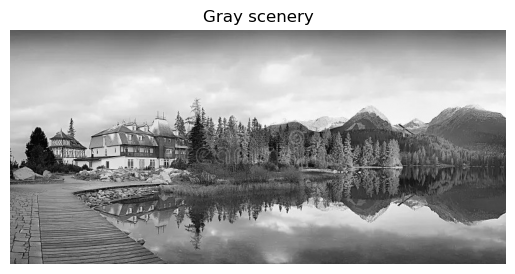

In [4]:
img_gray = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)

#Shape
print('Shape of img in Grayscale: ',img_gray.shape)                       # Grayscale: height x width only.


# First 4 rows and 2 columns
print('\n\nFirst 4 rows and 2 columns of image in Gray: \n',img_gray[:4,:2])

plt.imshow(img_gray, cmap = 'gray')
plt.title("Gray scenery")
plt.axis("off")
plt.show()

## Inverted Image color

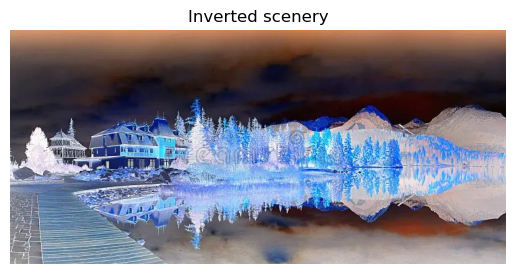

In [5]:
# Convert image to inverted image
img_invert = cv2.bitwise_not(img)

plt.imshow(img_invert)
plt.title("Inverted scenery")
plt.axis("off")
plt.show()

### Image Cropping and Copying ROI (Region of Interest)

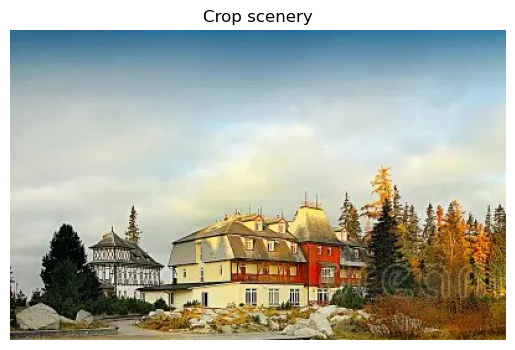

In [6]:
# Croping first 250 rows and 200 Columns
roi = img[:250,:400]

img[:250,:400] = roi

plt.imshow(roi)
plt.title("Crop scenery")
plt.axis("off")
plt.show()

### Brightness

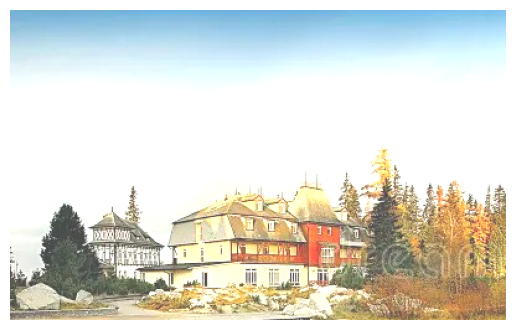

In [7]:
brighter = cv2.add(img,70)         # Adds 70 to pixel values

plt.imshow(brighter[:250,:400])
plt.axis('off')
plt.show()

# Can use cv2.add, cv2.subtract, cv2.multiply, etc. for pixelwise math.

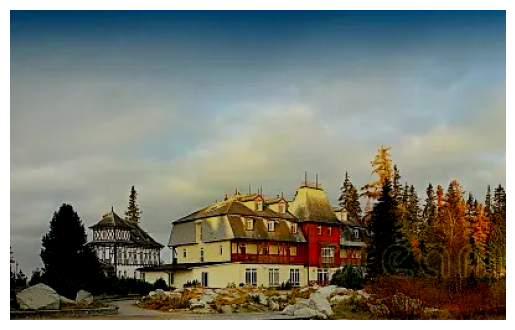

In [8]:
darker = cv2.subtract(img,50)   # substract 50 pixels values

plt.imshow(darker[:250,:400])
plt.axis('off')
plt.show()

### Blending of two images

In [9]:
# to blend two images, they should be of same size and same color type

# loading another image 
img2_BGR = cv2.imread('Crew.jpg')

# to RGB
img2 = cv2.cvtColor(img2_BGR,cv2.COLOR_BGR2RGB)

#Shape
print('img2 original size: ',img2.shape)


# changing size to make it compatible with previoud image ('img')
img2_resized = cv2.resize(img2, (img.shape[1],img.shape[0]))

print('img2_resized: ', img2_resized.shape)
print('img size: ',img.shape)


img2 original size:  (506, 900, 3)
img2_resized:  (377, 800, 3)
img size:  (377, 800, 3)


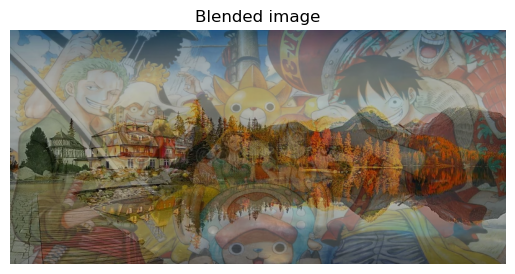

In [10]:
# Blend

blend = cv2.addWeighted(img,0.5,img2_resized,0.25,0)

plt.imshow(blend)
plt.title("Blended image")
plt.axis('off')
plt.show()

### Matrix Transpose

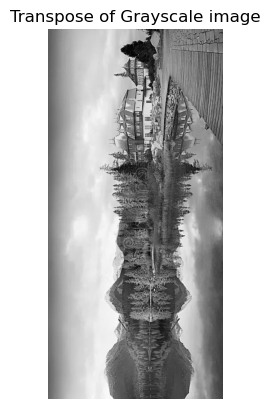

In [11]:
# Converting to GrayScale
img_gray = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2GRAY)

img_gray_T = img_gray.T

plt.imshow(img_gray_T, cmap = 'gray')
plt.title("Transpose of Grayscale image")
plt.axis('off')
plt.show()

### Matrix Resizing

In [12]:
# Grayscale image : img_gray

img_gray_reshaped = img_gray.reshape(-1)                # Flatten all pixels into a single vector

print('Shape of flattened Grayscale image: ',img_gray_reshaped.shape)
print("Shape of original Grayscale image: ",img_gray.shape)



Shape of flattened Grayscale image:  (301600,)
Shape of original Grayscale image:  (377, 800)


# Batch Transforms

#### What Are Batch Transforms?

- **Batching** means processing many data samples (images, vectors) at once—crucial for speed and learning stability in ML.

## Resize a Batch of Images

In [13]:
import glob

# make a list of all jpg file present in the directory
input_files = glob.glob('D:\Prince\prinsin_code\ML_Python\Hub\Test_Image_Processing/*.jpg')       


# Load all the jpg files of list input_files
batch = [cv2.imread(files) for files in input_files]
print('shape of Original file: ',batch[0].shape)
print('shape of Original file: ',batch[1].shape)

# now we can perform action on multiple file on one command


# This resizes every image in the batch to 128x128 pixels.
batch_resize = [cv2.resize(jpg_file, (128,128)) for jpg_file in batch]


print('\nShape of file after Batch resize: ',batch_resize[0].shape)
print('Shape of file after Batch resize: ',batch_resize[1].shape)


shape of Original file:  (377, 800, 3)
shape of Original file:  (506, 900, 3)

Shape of file after Batch resize:  (128, 128, 3)
Shape of file after Batch resize:  (128, 128, 3)


## Normalize Batch Before ML

In [14]:
def normalize_batch(batch):
    return [(img/255).astype(np.float32) for img in batch]


# normalising batch
batch_norm = normalize_batch(batch)

batch_norm[0][:2,:2]

array([[[0.5647059 , 0.42745098, 0.1764706 ],
        [0.5647059 , 0.42745098, 0.1764706 ]],

       [[0.5647059 , 0.42745098, 0.18039216],
        [0.5647059 , 0.42745098, 0.1764706 ]]], dtype=float32)

- Normalizes pixel values to for ML model input.
- Efficient coding: Use **vectorized**/list comprehension for speed

## Apply Functions Over Entire Batch (Vectorization)

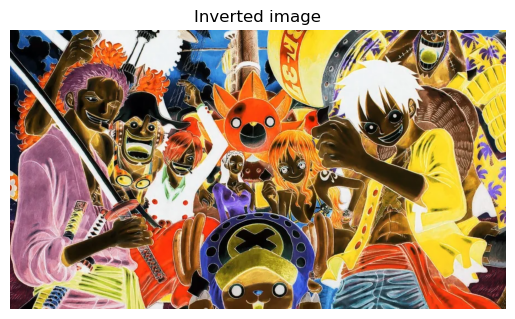

In [15]:
# coverting each image of batch into inverted pixels of image 

batch_invert = [cv2.bitwise_not(file) for file in batch]

# display of inverted image
plt.imshow(batch_invert[0])
plt.imshow(batch_invert[1])
plt.title("Inverted image")
plt.axis('off')
plt.show()

# Different colors with Another Example 

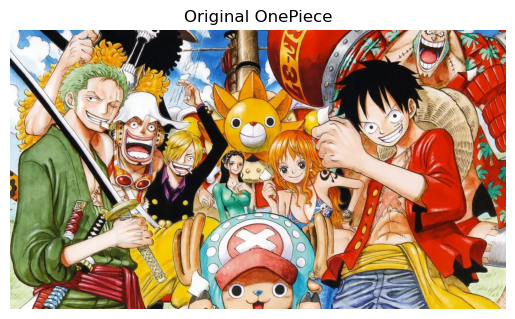

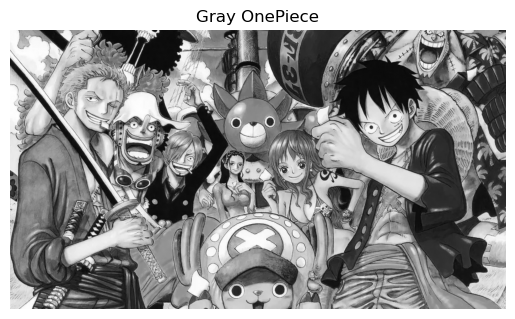

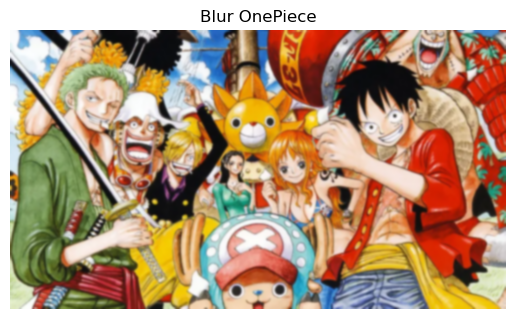

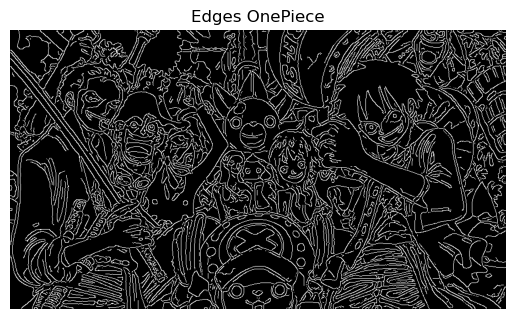

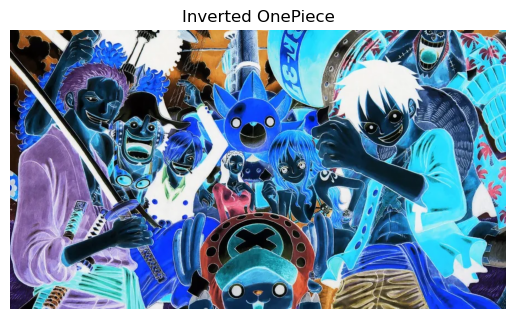

In [16]:
#loading image
op_BGR = cv2.imread("Crew.jpg")

#converting image to RGB
op = cv2.cvtColor(op_BGR,cv2.COLOR_BGR2RGB)

#display Image
plt.imshow(op)
plt.title("Original OnePiece")
plt.axis("off")
plt.show()


#convert to Gray
gray = cv2.cvtColor(op,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.title("Gray OnePiece")
plt.axis("off")
plt.show()


#blur image
blur = cv2.GaussianBlur(op,(9,9),0)
plt.imshow(blur)
plt.title("Blur OnePiece")
plt.axis("off")
plt.show()


#filtering and edge detection
edges = cv2.Canny(blur,100,50)
plt.imshow(edges, cmap = 'gray')
plt.title("Edges OnePiece")
plt.axis("off")
plt.show()

#Inverting image
invert = cv2.bitwise_not(op)
plt.imshow(invert)
plt.title("Inverted OnePiece")
plt.axis("off")
plt.show()
